In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf

tf.enable_eager_execution()



Eager execution immediately evaluates and returns the values of TF operations using `tf.Tensor`. 

In [2]:
tf.executing_eagerly()

True

In [12]:
a = np.arange(6)
a = a.reshape(2,3)
print(a)

[[0 1 2]
 [3 4 5]]


In [13]:
a = np.arange(6).reshape(2,3)
print(a)

[[0 1 2]
 [3 4 5]]


In [14]:
a.sum(axis=0)

array([3, 5, 7])

In [15]:
a.sum(axis=1)

array([ 3, 12])

In [16]:
a[:]

array([[0, 1, 2],
       [3, 4, 5]])

In [17]:
a[1,:]

array([3, 4, 5])

In [18]:
a[:,1]

array([1, 4])

In [19]:
c = np.arange(24).reshape(2,3,4) 
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [20]:
len(c)

2

In [22]:
for i, val in enumerate(c):
    print(i, val)
    

0 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
1 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [28]:
c[0,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
c[0,0,:]

array([0, 1, 2, 3])

In [30]:
c[0,:,1]

array([1, 5, 9])

In [27]:
for i in range(len(c[0,:])):
    print(i)

0
1
2


In [37]:
for i in range(len(c)):
    print(c[i])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [41]:
for i in c:
    print(i)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [40]:
# let's flatten the array
for i in c.flat:
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


Check views and copies, especially if we're changing the base array. 
Below, we see that using basic indexing, we can change the base array

In [59]:
z = np.zeros(9)
print('The base array for z is', z)
# Lets's create a view of data using basic indexing
z_view = z[:3] 
# The ellipsis below means for all indices
z_view[...] = 1
print('The base array for z is now', z) # changes base 

The base array for z is [0. 0. 0. 0. 0. 0. 0. 0. 0.]
The base array for z is now [1. 1. 1. 0. 0. 0. 0. 0. 0.]


In [42]:
# Let's set z back to original array
z = np.zeros(9)
print('The base array for z is', z)
#Let's create a copy of data using fancy indexing
z_copy = z[[0, 1, 2]]
z_copy[...] = 1
print('The base array for z is now', z) # doesn't change base 

The base array for z is [0. 0. 0. 0. 0. 0. 0. 0. 0.]
The base array for z is now [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
z = np.zeros(9)
# Let's make a copy of our fancy index
index = [0, 1, 2]
z[index] = 1
print(z)

[1. 1. 1. 0. 0. 0. 0. 0. 0.]


In [44]:
# arg1 = start, arg2 = end, arg3 = shape 
z = np.random.uniform(0, 1, (5,5))
print('z = \n', z)
# create a view of z, take up to row 3 and all columns
z1 = z[:3, :]
# create a copy of z, take rows 1, 2, 3 and all columns
z2 = z[[0, 1, 2], :]
# allclose(a, b) returns true if all elements of a and b
# are equal within a tolerance
np.allclose(z1, z2)

z = 
 [[0.0319413  0.2737415  0.1950018  0.7942239  0.79701533]
 [0.42688886 0.09281048 0.24603295 0.28489936 0.24425738]
 [0.66872928 0.96564877 0.88747571 0.52459655 0.52498664]
 [0.43582488 0.23466813 0.31488897 0.61764435 0.31681449]
 [0.12819048 0.68600079 0.26233341 0.76179806 0.53090046]]


True

In [45]:
# Let's now check the base of z1 and z2
print('z1 base is z is', z1.base is z)
print('z2 base is z is', z2.base is z)
print('z2 base is None is', z2.base is None)

z1 base is z is True
z2 base is z is False
z2 base is None is True


Broadcasting

In [46]:
# Let's look at an example
x = np.arange(4)
print(' x = \n', x)
print('The shape of x is', x.shape)
print('\n')

xx = x.reshape(4,1)
print(' xx = \n', xx)
print('The shape of xx is', xx.shape)
print('\n')

y = np.ones(5)
print('y = \n', y)
print('The shape of y is', y.shape)
print('\n')

 x = 
 [0 1 2 3]
The shape of x is (4,)


 xx = 
 [[0]
 [1]
 [2]
 [3]]
The shape of xx is (4, 1)


y = 
 [1. 1. 1. 1. 1.]
The shape of y is (5,)




In [47]:
# This will work since 
#     xx (2d array): 4 x 1
#      y (1d array):     5
# Result (2d array): 4 x 5
result = xx+y
print(result)

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


Logical indexing:

In [48]:
y = np.arange(35).reshape(5,7)
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [49]:
# The elements are iterated and returned in row-major
# order. The result is a copy of the data not a view as
# with slices.
b = y > 20
b

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [50]:
y[b]

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [51]:
b[:,5]

array([False, False, False,  True,  True])

In [52]:
y[b[:,5]]

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [53]:
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [3]:
x = [[2.]]
m = tf.matmul(x,x)
print('hello, {}'.format(m))

hello, [[4.]]


In [54]:
# More fancy
# Let's create a random array
# Set the seed state to 42
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [55]:
# This will return a Python list
[x[3], x[7], x[2]]

[71, 86, 14]

In [56]:
# Let's use fancy indexing to return an array copy
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [58]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [60]:
x.size

10

In [64]:
x = x.reshape(5,2)
x

array([[51, 92],
       [14, 71],
       [60, 20],
       [82, 86],
       [74, 74]])

In [66]:
# this combines basic and fancy indexing
x[:1, [0,1]]

array([[51, 92]])

In [4]:
a = tf.constant([[1, 2],
                 [3, 4]])
a

<tf.Tensor: id=5, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [5]:
b = tf.add(a, 1)
b

<tf.Tensor: id=8, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [6]:
# operator overloading
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [8]:
# can use NumPy values
c = np.multiply(a, b)
c

array([[ 2,  6],
       [12, 20]], dtype=int32)

In [9]:
print(a.numpy())

[[1 2]
 [3 4]]


In [27]:
tfe = tf.contrib.eager

Benchmarks: for compute-heavy models like ResNet50 training on GPU, eager exec is comparable to graph execution. The gap grows larger for models with less computation and there is a lot of work to be done for optimizing models with lots of small ops. 

Note that when working with graphs in Tensorflow we can leverage distributed training, perfomrance optimizations, and deployment to production butthe code can be difficult to debug. 

For building the trianing graph, the Python program builds a graph representing the computation, then invokes `Session.run` to send the graph to a C++ runtime. 

Deploying code wrtitten using the eager execution is more difficult: generate a graph from the model, or run the Python runtime and code directly on the server. Best to write the code for both eager execution and graph execution. Write, debug, and iterate then import the model using `tf.train.Checkpoint`. This will save and restore the model. 

We can enable eager execution in TF graph environment using `tfe.py_func`. This can be used when `tf.enable_eager_execution()` has NOT been called. 

In [7]:
def my_py_func(x):
    x = tf.matmul(x, x) # you can use tf ops
    print(x)
    return x

In [8]:
with tf.Session() as sess:
    x = tf.placeholder(dtype=tf.float32)
    # call eager funtion in th graph
    pf = tf.py_func(my_py_func, [x], tf.float32)
    
    sess.run(pf, feed_dict={x: [[2.0]]})

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


Dynamic flow control

In [9]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy()+1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print("fizzbuzz")
        elif int(num % 3) == 0:
            print("fizz")
        else:
            print(num.numpy())
        counter += 1

In [10]:
fizzbuzz(15)

1
2
fizz
4
5
fizz
7
8
fizz
10
11
fizz
13
14
fizzbuzz


In [82]:
class MyBaseClass(object):
    def __init__(self, value):
        self.value = value
        
class TimesFiveCorrect(MyBaseClass):
    def __init__(self, value):
        super(TimesFiveCorrect, self).__init__(value)
        self.value *= 5
        
class PlusTwoCorrect(MyBaseClass):
    def __init__(self, value):
        super(PlusTwoCorrect, self).__init__(value)
        self.value += 2

In [83]:
class GoodWay(TimesFiveCorrect, PlusTwoCorrect):
    def __init__(self, value):
        super().__init__(value)

In [84]:
GoodWay.mro()

[__main__.GoodWay,
 __main__.TimesFiveCorrect,
 __main__.PlusTwoCorrect,
 __main__.MyBaseClass,
 object]

In [87]:
out = GoodWay(5)
out

In [88]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square(Rectangle):
    def __init__(self, length):
        super(Square, self).__init__(length, length)

In Python 3, the `super(Square, self)` call is equivalent to the parameterless super() call. The first parameter refers to the subclass Square, while the second parameter refers to a Square object which, in this case, is self. 

In [90]:
class MNISTmodel(tf.keras.Model):
    def __init__(self):
        super(MNISTmodel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=10)
        self.dense2 = tf.keras.layers.Dense(units=10)
        
    def call(self, input):
        """Runs the model"""
        result = self.dense1(input)
        result = self.dense2(result)
        result = self.dense3(result)
        return result

In [91]:
model = MNISTmodel()

#### Eager training
`tf.GradientTape` is used during execution to trace operations for computing gradients. Note, all forward pass operations get recorded to the tape . To compute the gradient play the tape backwards and then discard. 

In [12]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = w * w
    
grad = tape.gradient(loss, w)
print(grad)

RuntimeError: tf.Variable not supported when eager execution is enabled. Please use tf.contrib.eager.Variable instead

Train a model

In [13]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
          (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
           tf.cast(mnist_labels, tf.int64)))
dataset = dataset.shuffle(1000).batch(32)
dataset

<BatchDataset shapes: ((?, 28, 28, 1), (?,)), types: (tf.float32, tf.int64)>

In [14]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(10)
])

EVen without training we can inspect the output in eager execution mode since Keras has a builtin training loop (uses the `fit` method):

In [15]:
for images, labels in dataset.take(1):
    print("Logits:", mnist_model(images[0:1]).numpy())

Logits: [[ 0.00261663  0.01329279 -0.00699361 -0.00612858  0.01838591 -0.01159101
   0.00783103 -0.00500301 -0.00704037 -0.01219437]]


In [16]:
optimizer = tf.train.AdamOptimizer()
loss_history = []

for (batch, (images, labels)) in enumerate(dataset.take(400)):
    if batch % 10 == 0:
        print('.', end='')
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)
        
    loss_history.append(loss_value.numpy())
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables),
                             global_step=tf.train.get_or_create_global_step())

........................................

Text(0, 0.5, 'Loss')

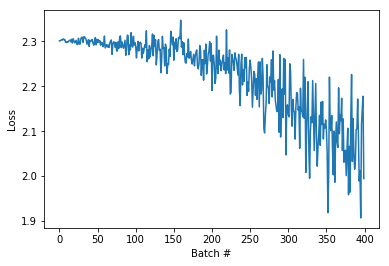

In [18]:
from matplotlib import pyplot as plt
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss')

`tf.Variable` object store mutable `tf.Tensor` values accessed during training to make auto diff easier. Parameters of the model can be encapsulated in classes in variables. Better encapsulate model parameters by using `tf.Variable` with `tf.Gradienttape` 

In [28]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.W = tfe.Variable(5., name='weight')
        self.B = tfe.Variable(10., name='bias')
    def call(self, inputs):
        return inputs * self.W + self.B

In [29]:
NUM_EXAMPLES = 2000
training_inputs = tf.random_normal([NUM_EXAMPLES])
noise = tf.random_normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

In [30]:
# The loss function to be optimized
def loss(model, inputs, targets):
    error = model(inputs) - targets
    return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, [model.W, model.B])

In [31]:
# Define:
# 1. A model
# 2. Derivatives of a loss function with respect to model parameters
# 3. A strategy for updating the variables based on derivaties. 

model = Model()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# Training loop
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]),
                             global_step=tf.train.get_or_create_global_step())
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
        
print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W={}, B={}".format(model.W.numpy(), model.B.numpy()))

Initial loss: 68.709
Loss at step 000: 66.032
Loss at step 020: 30.026
Loss at step 040: 13.956
Loss at step 060: 6.783
Loss at step 080: 3.582
Loss at step 100: 2.153
Loss at step 120: 1.515
Loss at step 140: 1.230
Loss at step 160: 1.103
Loss at step 180: 1.047
Loss at step 200: 1.021
Loss at step 220: 1.010
Loss at step 240: 1.005
Loss at step 260: 1.003
Loss at step 280: 1.002
Final loss: 1.001
W=2.995272397994995, B=2.032135009765625


### Use objects for state during eager execution

During eager execution, variables persist until the last reference to the object is removed and is then deleted. 


In [32]:
if tf.test.is_gpu_available():
    with tf.device("gpu:0"):
        v = tf.Variable(tf.random_normal([1000, 1000]))
        v = None # no longer takes up GPU memory

In [33]:
# This will save and restore the tf.Variables to and from checkpoints
x = tfe.Variable(10.)
checkpoint = tf.train.Checkpoint(x=x)
x.assign(2.)    # Assigns a new value to the variables and save.
checkpoint_path = './ckpt/'
checkpoint_path = ('./ckpt/')

x.assign(11.)    # Change he variable after saving

# Restore values from the checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))
print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=11.0>


To save and load model use `tf.train.Checkpoint` to store the internal state of objects without using hidden variables. To record the model, optimizer, and global step pass to `tf.train.Checkpoint`

In [34]:
import os
import tempfile

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
checkpoint_dir = tempfile.mkdtemp()
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
root = tf.train.Checkpoint(optimizer=optimizer,
                           model=model,
                           optimizer_step=tf.train.get_or_create_global_step())

root.save(checkpoint_prefix)
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [40]:
max_value = tf.placeholder(tf.int64, shape=[])
dataset = tf.data.Dataset.range(max_value)
iterator = dataset.make_initializable_iterator()
next_element = iterator.get_next()

# initialize an iterator over a dataset with 10 elements.
sess.run(iterator.initializer, feed_dict={max_value:10})
for i in range(10):
    value = sess.run(next_element)
    assert i == value

AttributeError: module 'tensorflow.contrib.eager.python.tfe' has no attribute 'placeholder'